In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
df = pd.read_csv('/home/jupyter-an.karpov/shared/lesson_3_data.csv', encoding='windows-1251')

In [4]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [5]:
user_df = df[['tc', 'art_sp']]

In [6]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [7]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [8]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [9]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [10]:
brnad_name = 'MARAVILLA 500 G Store_Brand'

In [11]:
brnad_name.split(' ')[-1]

'Store_Brand'

In [12]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [13]:
# user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# используем lambda функцию, чтобы разрезать строку по пробелу и взять последний элемент

In [14]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [15]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')

In [16]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [17]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [18]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [19]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [20]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [21]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [22]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


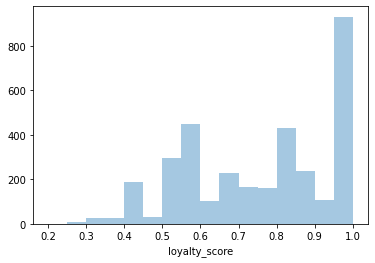

In [25]:
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)

In [31]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) 

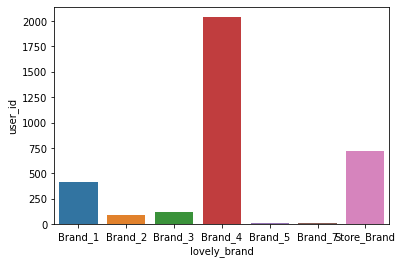

In [34]:
ax = sns.barplot(x="lovely_brand", y="user_id", data=brands_loyalty)

In [ ]:
#черновик дз

In [3]:
names = str('a' + ',' +'b')
names

'a,b'

In [4]:
names.split(',')

['a', 'b']

In [8]:
df = pd.DataFrame([1,2,3,4] ,columns = ['client_id'])
df

,client_id
0,1
1,2
2,3
3,4


In [11]:
df = df.rename(columns = (dict(zip(df.columns, ['sex']))))

In [17]:
data = pd.read_csv('taxi_peru.csv', sep = ';', encoding = 'cp1251', parse_dates = ['start_at', 'end_at', 'arrived_at'])
data.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [19]:
data.groupby('source').agg({'journey_id': 'count'})/data.groupby('source').agg({'journey_id': 'count'}).sum()

,journey_id
source,
Android,0.213546
Wap,0.005916
iPad,0.024839
iPhone,0.423743
web,0.331956


In [39]:
a = data.groupby('rider_score', as_index = False) \
    .agg({'journey_id': 'count'})

a['percentage'] = a['journey_id']/data.groupby('rider_score', as_index = False).agg({'journey_id': 'count'})['journey_id'].sum()
a = a[['rider_score', 'percentage']]
a

,rider_score,percentage
0,0.0,0.022872
1,1.0,0.002079
2,2.0,0.001949
3,3.0,0.013840
4,4.0,0.088304
5,5.0,0.870955


In [37]:
a['percentage'].mul(100)

0    14.300654
1     1.228758
2     0.810458
3     2.967320
4    21.882353
5    58.810458
Name: percentage, dtype: float64

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

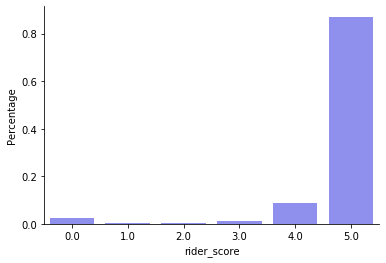

In [40]:
ax = sns.barplot(x='rider_score', y='percentage', data=a, color='blue', alpha=0.5)
ax.set(xlabel='rider_score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [43]:
data = pd.read_csv('user_data.csv', sep = ',')
data_l = pd.read_csv('logs.csv', sep = ',')

In [68]:
data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [44]:
data_l

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [45]:
data_l.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [65]:
a = data_l.query('success == True') \
    .groupby('client') \
    .agg({'success' :'count'}) \
    .sort_values('success', ascending = False).head(9).index

In [69]:
data_j = data_l.merge(data, on = 'client')
data_j.query('success == True and premium == True') \
    .groupby('platform') \
    .agg({'success' :'count'}) \
    .sort_values('success', ascending = False)

,success
platform,
phone,177
computer,108
tablet,18


In [80]:
df = data_j.query('success == True') \
    .groupby('client') \
    .agg({'success' :'sum'}) \
    .sort_values('success', ascending = False)
df

,success
client,
12179,41.0
36165,41.0
28719,41.0
61473,41.0
61468,41.0
...,...
34642,1.0
34640,1.0
34630,1.0


In [66]:
a.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

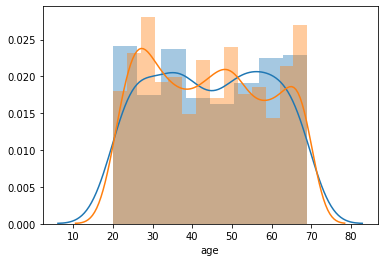

In [72]:
ax = sns.distplot(data_j.query('premium == True').age)
ax = sns.distplot(data_j.query('premium == False').age)

In [ ]:
ax.set(xlabel='rider_score', ylabel='Percentage')

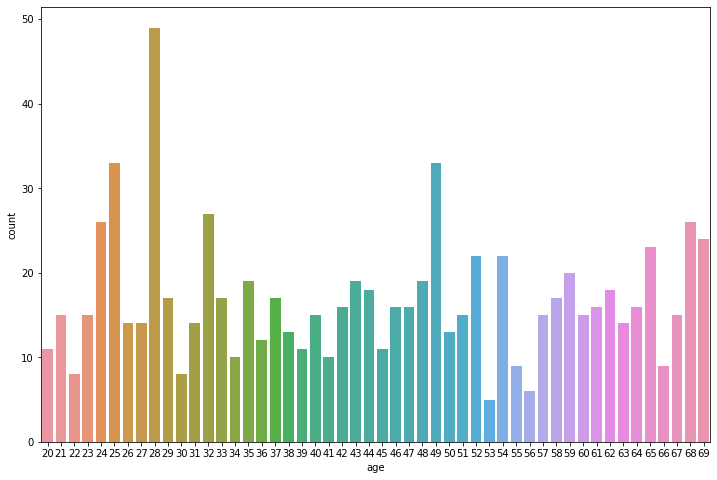

In [96]:
data_ = data_j.query("platform == 'computer' and success == True") \
#                 .groupby('age', as_index = False) \
#                 .agg({'client' : 'count'}) \
#                 .sort_values('client')
data_             
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="age", data=data_)

In [93]:
data_

,age,client
33,53,5
36,56,6
2,22,8
10,30,8
35,55,9
46,66,9
21,41,10
14,34,10
25,45,11
19,39,11
